In [1]:
import numpy as np
# from data_loader import LIBS_Toolkit
from LIBS_handler import LIBS_Toolkit
import matplotlib.pyplot as plt


%load_ext autoreload

In [23]:
%autoreload 1
%autoreload 2

# 1. Initialize Class

In [2]:
fname = r"E:/Data/Data_LIBS/ForHolo/wrench_map"

In [3]:
libs_mainupulator = LIBS_Toolkit(fname, overwrite = True)

## 1.1 Load the Dataset

In [4]:
libs_mainupulator.load_dataset(baseline_corrected = False)

In [24]:
libs_mainupulator.update_elements(["V", "Cr", "Fe", "Al", "O"])

## 1.2 Perform basic preprocessing

 -> Baseline Removal 
 
 -> Normalize to Sum

In [5]:
_ = libs_mainupulator.baseline_correct()
_ = libs_mainupulator.normalize_to_sum()

## 1.3 Basic Visualization of Single Emission line along with average Spectrum

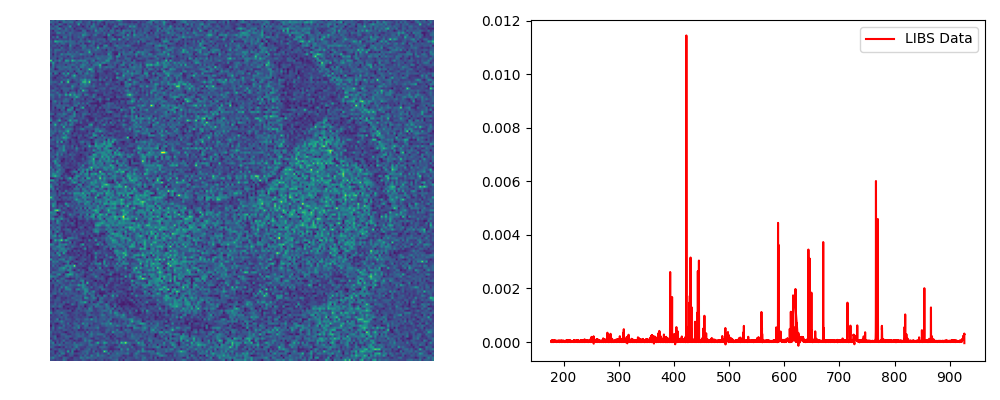

In [6]:
%matplotlib widget
libs_mainupulator.basic_analysis(345.33)

# 2. Feature Extraction

## 2.1 Perform automatic feature extraction using the FFT Algorithm

In [7]:
# fft_metric = libs_mainupulator.automatic_feature_extraction(n_features = 40, sigma = 1)

In [7]:
libs_mainupulator.automatic_feature_extraction(sigma = 1)

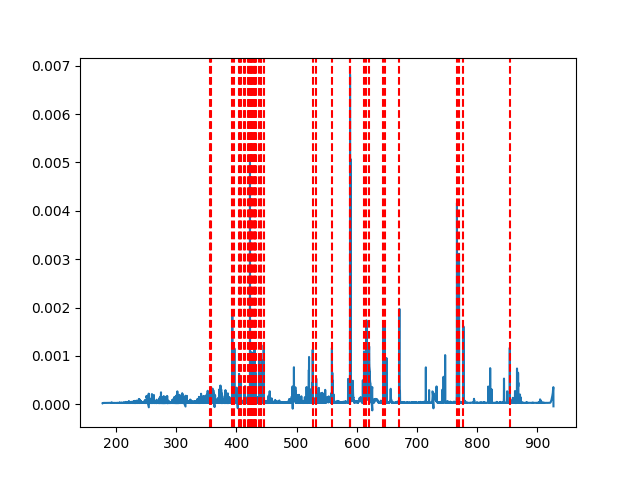

In [8]:
fig, ax = plt.subplots()
ax.plot(libs_mainupulator.wavelengths, np.mean(libs_mainupulator.dataset, axis = (0,1)))
_ = [ax.axvline(libs_mainupulator.x_features[i], color = 'r', ls = '--') for i in range(len(libs_mainupulator.x_features))]

# ax1 = ax.twinx()
# ax1.plot(libs_mainupulator.wavelengths, fft_metric, color = 'k', alpha = 0.6, lw = 0.4)

## 2.2 Visualize all the extracted features along with respective wavelengths

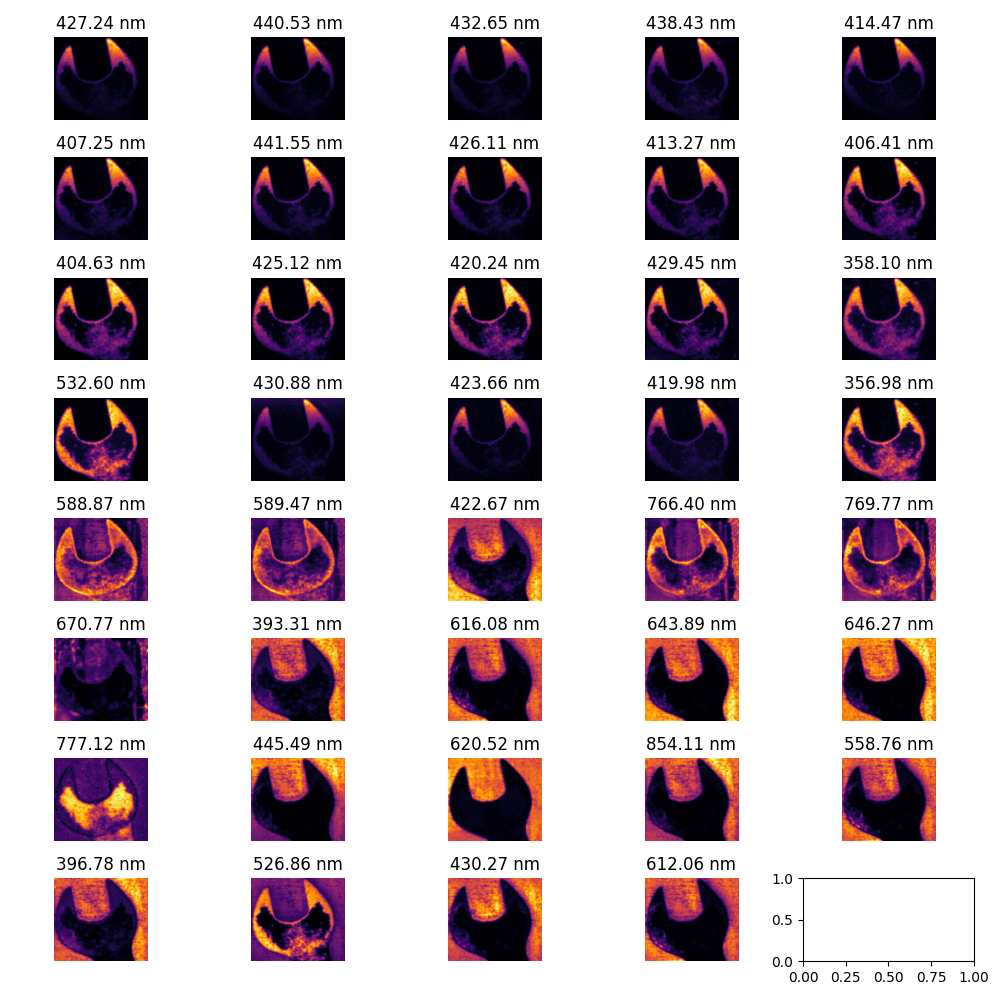

In [9]:
fig, axs = plt.subplots(8, 5, figsize = (10, 10))
axs = axs.flatten()
for i in range(libs_mainupulator.features.shape[0]):
    ax = axs[i]
    ax.imshow(libs_mainupulator.features[i], cmap = 'inferno')
    ax.set_title(f"{libs_mainupulator.x_features[i]:.2f} nm")
    ax.axis('off')
fig.tight_layout()

## 2.3 Identify the extracted features

In [25]:
identified_elements = libs_mainupulator.id_features(wavelength_tolerance = 0.2)
libs_mainupulator.detailed_ids()

Identified Elements:
V:
  - Feature at 427.24 nm matches reference line at 427.15 nm
    Relative Intensity: 0.124, Category: Low Intensity
  - Feature at 440.53 nm matches reference line at 440.66 nm
    Relative Intensity: 0.129, Category: Low Intensity
  - Feature at 438.43 nm matches reference line at 438.47 nm
    Relative Intensity: 0.610, Category: High Intensity
  - Feature at 441.55 nm matches reference line at 441.65 nm
    Relative Intensity: 0.035, Category: Ultra low Intensity
  - Feature at 413.27 nm matches reference line at 413.20 nm
    Relative Intensity: 0.174, Category: Low Intensity
  - Feature at 429.45 nm matches reference line at 429.61 nm
    Relative Intensity: 0.075, Category: Low Intensity
  - Feature at 423.66 nm matches reference line at 423.58 nm
    Relative Intensity: 0.025, Category: Ultra low Intensity
  - Feature at 393.31 nm matches reference line at 393.40 nm
    Relative Intensity: 0.031, Category: Ultra low Intensity
  - Feature at 612.06 nm matc

In [26]:
libs_mainupulator.print_element_probabilities()

Estimated Element Probabilities:
Fe: 59.78%
V: 23.31%
O: 9.85%
Cr: 7.06%


# 3. Classification

## 3.1 Perform k-means clustering

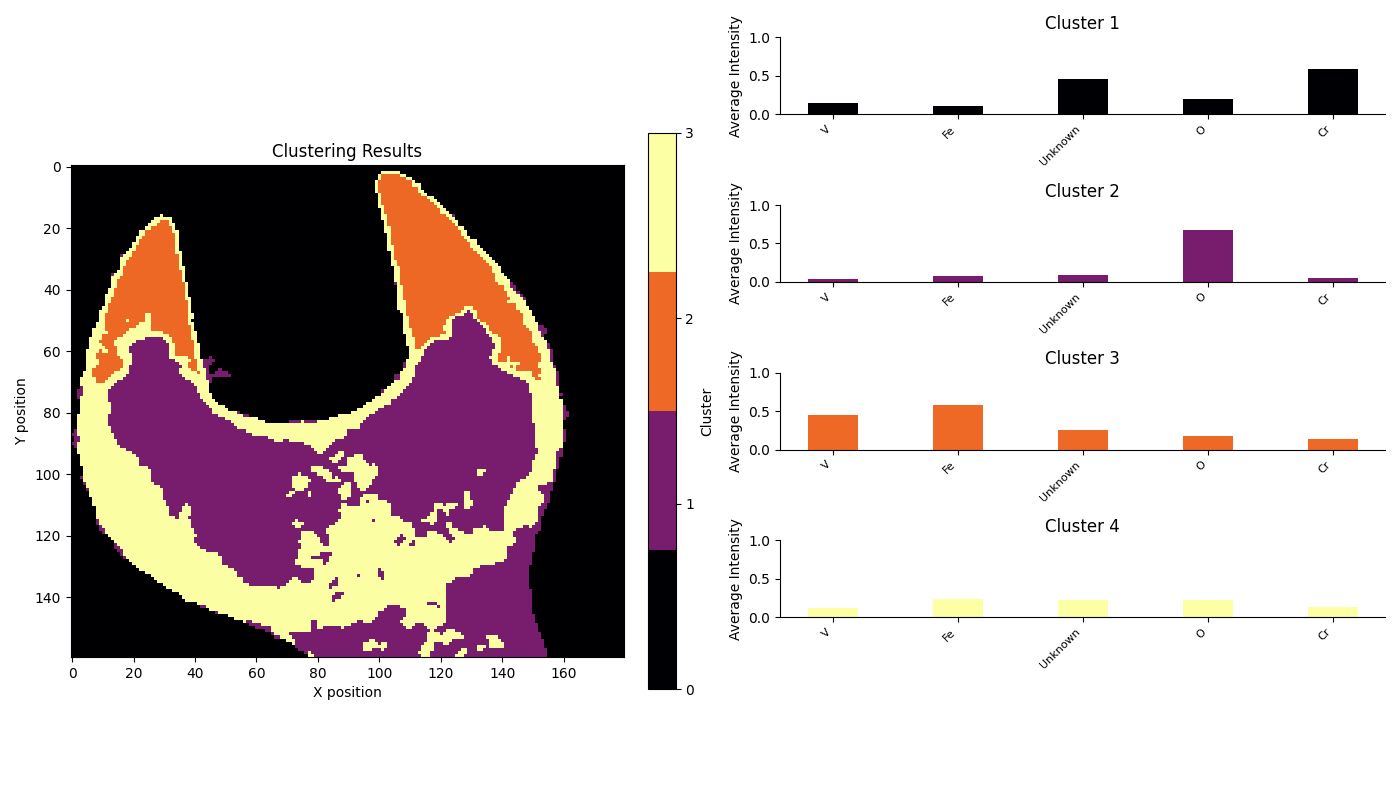

In [27]:
labelled, cluster_probabilities = libs_mainupulator.analyze_clusters(n_clusters = 4, random_state = 5)

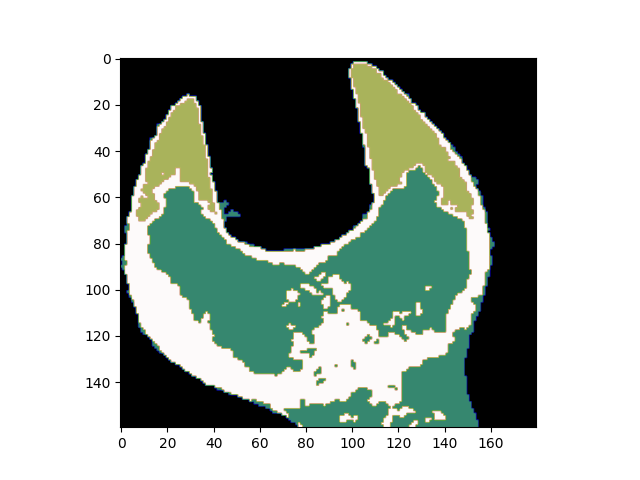

In [18]:
plt.figure()
plt.imshow(labelled, cmap = 'gist_earth')

# ToDo: Map of the relative intensity of each detected element in each cluster

## Extra Load single wavelength (takes too long)

In [19]:
im = libs_mainupulator.load_single_wavelength(345.32, plot = False)

# A. Testing

In [18]:
from LIBS_SPEC.element_new import element

element_data = element(["Rb"])
ll = element_data.generate_lines_database(max_ion_state=1, lower_limit = 200., upper_limit =900.)

In [1]:
from line_handler import line_simulation

toolkit = line_simulation()

In [2]:
toolkit.identify_elements([345.33, 670.76], wavelength_tolerance = 0.2)

{'Co': [(345.33, 345.35, 0.944, 'High Intensity')],
 'Li': [(670.76, 670.78, 1.0, 'High Intensity')]}